In [1]:
%cd "../"
%pwd

import numpy as np
import matplotlib.pyplot as plt

import io 
import pandas as pd  
import pyreadr

from load_data import *
from pred_score import *
from Filter_FS import *
from hybrid_FS import *
from overlap_genes import *
from crossValidation import *

/Users/dormann/Documents/GitHub/src


In [2]:
#Fixing seed to get reproducible results
random.seed(3)
np.random.seed(3)

# Baseline with preselected genes 

In [3]:
#Load preprocess data
LK = np.array(pd.read_csv ('../data/processed_data/LK.csv'))
y = np.array(LK[:,-1],dtype=int)
LK = LK[:,0:-1]


In [4]:
#Predict and evaluate
model = FamiliesClusters(np.unique(y),compute_precision,True)
pred = model.fit_predict(LK,y)

In [5]:
print(LK.shape, len(pred))
acc = model.score_
print(acc)

(610, 1379) 610
0.136


In [6]:
print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))

TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (102.0, 648.0, 0.1574074074074074, 0.37777777777777777, 0.9876770942283921, 0.136, 0.9967757412916227, 0.864, 0.6222222222222222)


# Mutual information maximizer (MIM)

KeyboardInterrupt: 

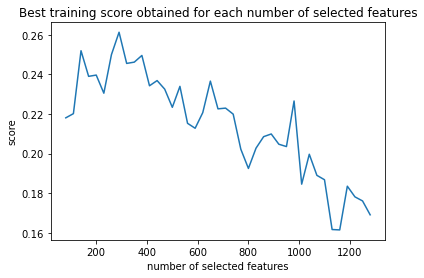

In [7]:
#Define parameters for MIM method
N = np.arange(80,1300,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 4, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))


1
test 0.33793854014072255 0.050119819760069684
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (167.0, 598.0, 0.2792642140468227, 0.5154320987654321, 0.988493140141238, 0.21830065359477124, 0.9969531128706722, 0.7816993464052288, 0.4845679012345679)


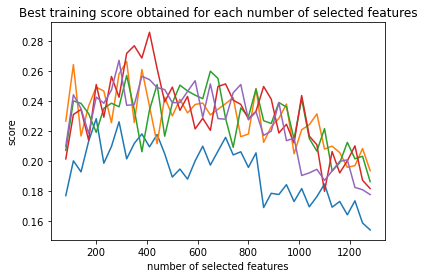

2
test 0.38519529475735165 0.07370710105512206
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (174.0, 599.0, 0.2904841402337229, 0.5087719298245614, 0.9895954560455785, 0.22509702457956016, 0.9970598529926497, 0.7749029754204398, 0.49122807017543857)


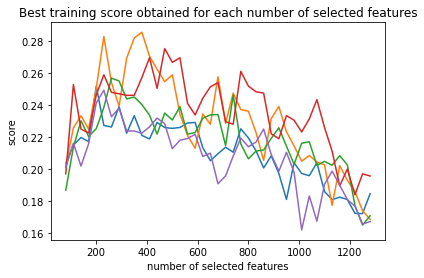

3
test 0.36798663820710875 0.05247883032994728
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (168.0, 566.0, 0.2968197879858657, 0.4692737430167598, 0.9903457451344944, 0.22888283378746593, 0.9967382534205421, 0.771117166212534, 0.5307262569832403)


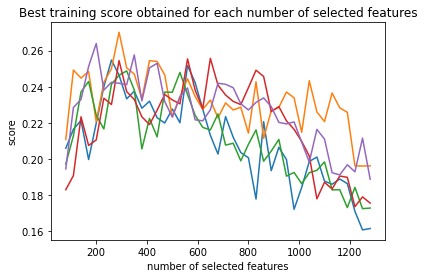

4
test 0.3904311161791542 0.06414881681830079
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (175.0, 569.0, 0.30755711775043937, 0.501432664756447, 0.990512555440691, 0.23521505376344087, 0.9970795078802934, 0.7647849462365591, 0.498567335243553)


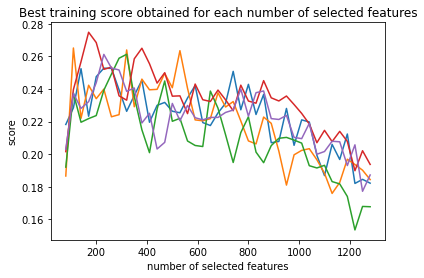

5
test 0.3519445038501384 0.039854783879482096
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (168.0, 588.0, 0.2857142857142857, 0.45528455284552843, 0.9907966817968383, 0.2222222222222222, 0.9968347952065256, 0.7777777777777778, 0.5447154471544715)


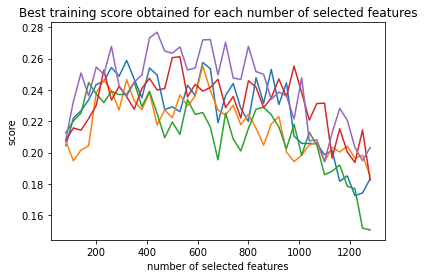

6
test 0.3821970052388772 0.031422284312678544
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (171.0, 563.0, 0.3037300177619893, 0.4684931506849315, 0.9906479958804671, 0.2329700272479564, 0.9967575879128225, 0.7670299727520435, 0.5315068493150685)


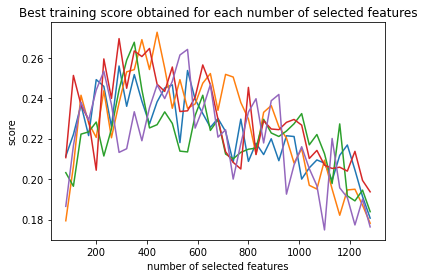

7
test 0.3401236568999345 0.03176080643622439
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (161.0, 595.0, 0.27058823529411763, 0.47774480712166173, 0.989329268292683, 0.21296296296296297, 0.9968197177499503, 0.7870370370370371, 0.5222551928783383)


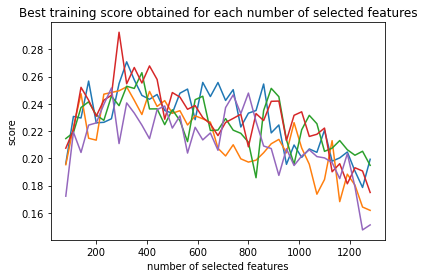

8
test 0.35779298134365234 0.062338905535523965
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (152.0, 572.0, 0.26573426573426573, 0.41081081081081083, 0.99091183526907, 0.20994475138121546, 0.9965167372373572, 0.7900552486187845, 0.5891891891891892)


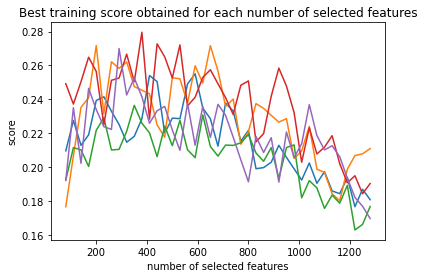

9
test 0.3521517150721739 0.04625669086371922
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (170.0, 605.0, 0.2809917355371901, 0.4788732394366197, 0.9893198227620174, 0.21935483870967742, 0.996709765770893, 0.7806451612903226, 0.5211267605633803)


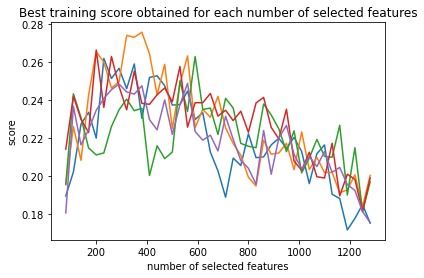

10
test 0.36109918052221773 0.025875833967501684
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (168.0, 541.0, 0.31053604436229204, 0.450402144772118, 0.9911073853082828, 0.23695345557122707, 0.9966116262541115, 0.763046544428773, 0.5495978552278821)


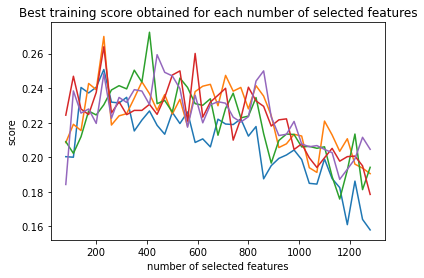

11
test 0.35883138895307615 0.05308865469801752
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (154.0, 553.0, 0.27848101265822783, 0.39185750636132316, 0.9918791118421053, 0.21782178217821782, 0.9964739901448763, 0.7821782178217822, 0.6081424936386769)


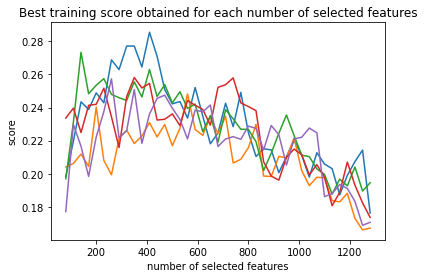

12
test 0.35642503901061495 0.029205986000720732
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (179.0, 594.0, 0.30134680134680136, 0.514367816091954, 0.9894134630807891, 0.2315653298835705, 0.9969650168809712, 0.7684346701164295, 0.48563218390804597)


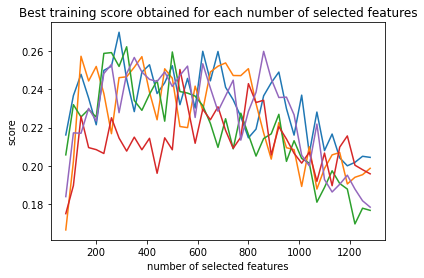

ValueError: x and y must have same first dimension, but have shapes (12,) and (0,)

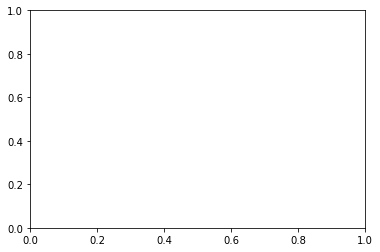

In [11]:
neighbors =  np.arange(1,13,1)
score_plot = []

for p in neighbors:
    print(p)
    #Define parameters for MIM method
    N = np.arange(80,1300,30)
    kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'plot': True} 

    subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  MIM, **kwargs)

    mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
    print('test', mean_score_test, std_score_test)

    #Predict and evaluate on whole data  set
    model = FamiliesClusters(np.unique(y),compute_precision,True)
    x_subset = LK[:, subset]
    pred = model.fit_predict(x_subset,y)

    print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))
    plt.show()

# Anova F test

test 0.33584920339967916 0.050564891623337806
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (133.0, 559.0, 0.23792486583184258, 0.3643835616438356, 0.9920836106665911, 0.19219653179190752, 0.9966992004097545, 0.8078034682080925, 0.6356164383561644)


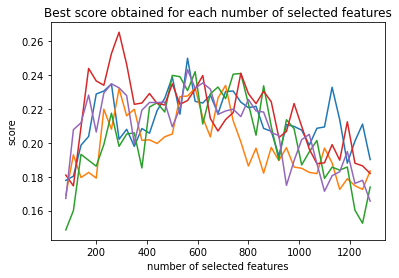

In [11]:
#Define parameters for ANOVA method
N = np.arange(80,1300,30)
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  ANOVA, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred))    

# Hybrid methods

# Mutual information and stimulated annealing

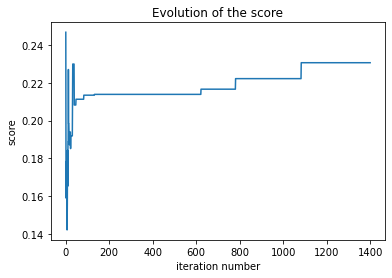

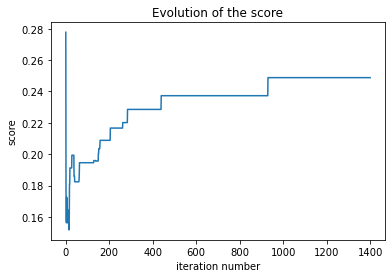

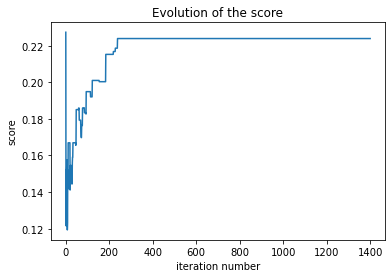

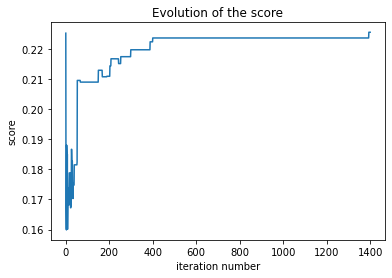

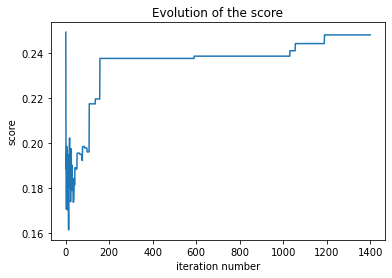

test 0.28808677854092757 0.04101285100788472
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (131.0, 645.0, 0.20310077519379846, 0.43666666666666665, 0.9872312626202637, 0.16881443298969073, 0.9966225668491946, 0.8311855670103093, 0.5633333333333334)


In [12]:
#Define parameters for MI + stimulated annealing method
N = np.array([700])
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_iter': 1400, 'n_neighbors': 3, 'p_mutate': 0.11, 'c': 1, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  MI_stimulated_annealing, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

0.01


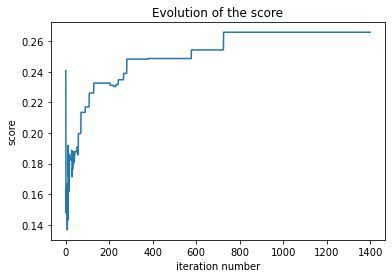

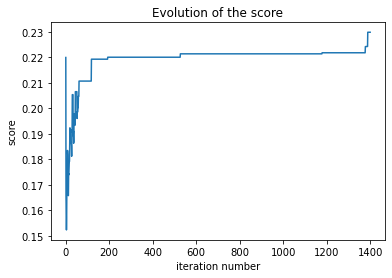

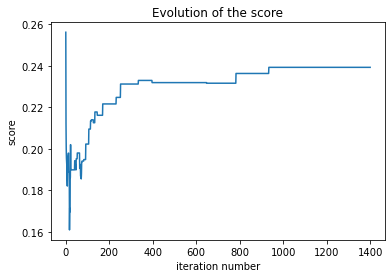

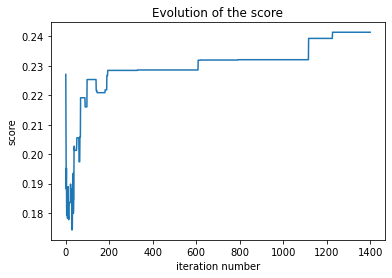

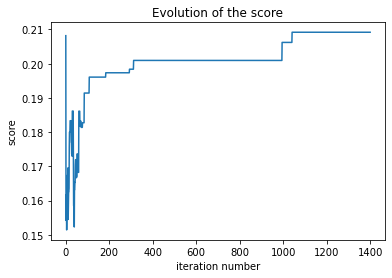

test 0.29591355680673714 0.046826228783142826
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (137.0, 638.0, 0.21473354231974923, 0.479020979020979, 0.9870962522500657, 0.1767741935483871, 0.9969563263471831, 0.8232258064516129, 0.5209790209790209)
0.060000000000000005


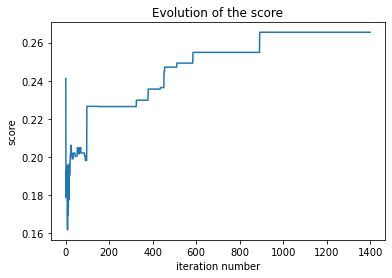

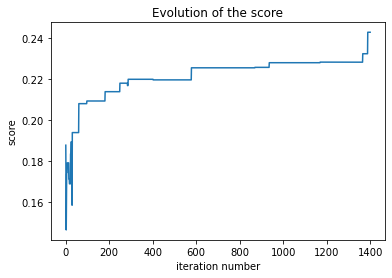

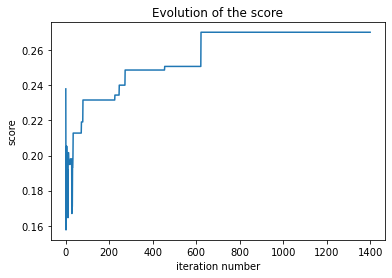

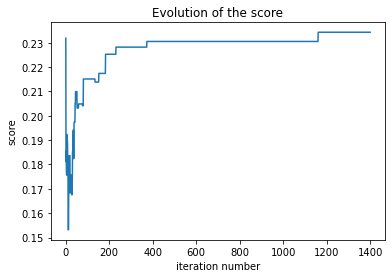

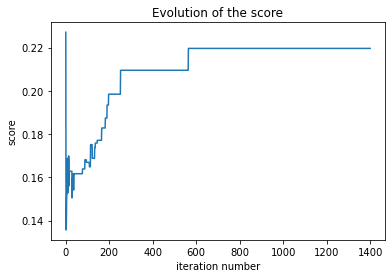

test 0.3167313293350519 0.08036508930821551
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (135.0, 626.0, 0.21565495207667731, 0.47703180212014135, 0.9864674982165632, 0.1773981603153745, 0.9967672178414626, 0.8226018396846255, 0.5229681978798587)
0.11


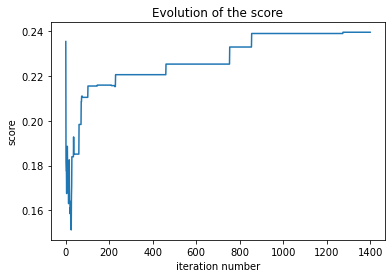

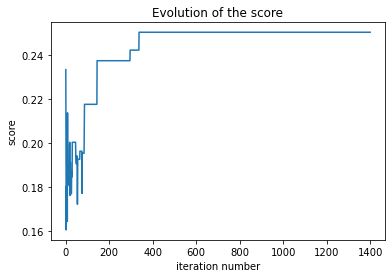

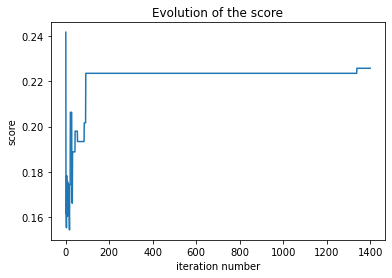

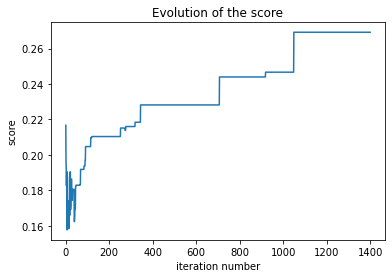

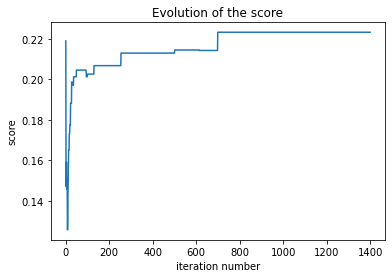

test 0.31967398383376 0.05629499710758898
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (134.0, 626.0, 0.21405750798722045, 0.44370860927152317, 0.988216026956309, 0.1763157894736842, 0.9968100256337226, 0.8236842105263158, 0.5562913907284768)
0.16000000000000003


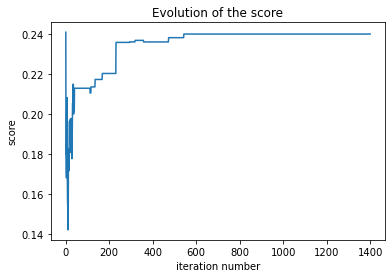

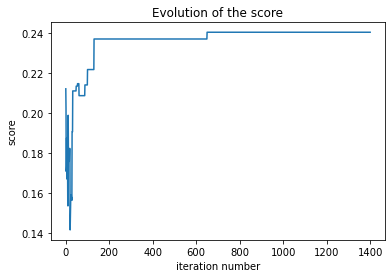

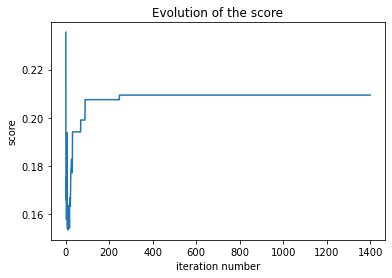

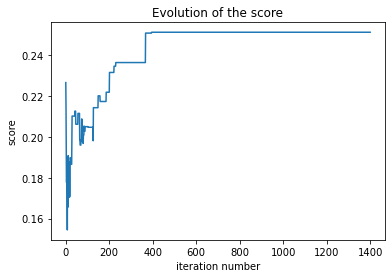

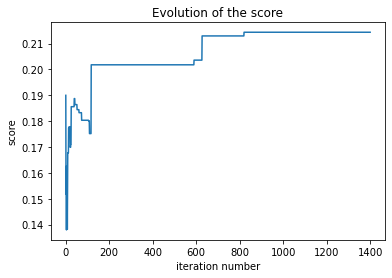

test 0.2988792662344691 0.06595263883418773
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (154.0, 636.0, 0.24213836477987422, 0.555956678700361, 0.9857152482986322, 0.1949367088607595, 0.9972051806407635, 0.8050632911392405, 0.44404332129963897)
0.21000000000000002


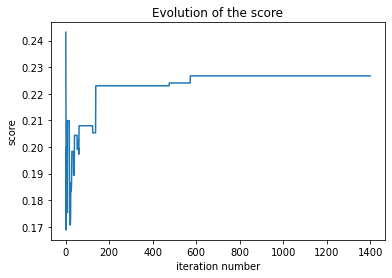

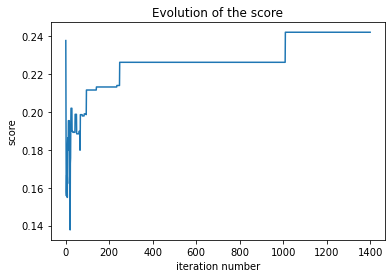

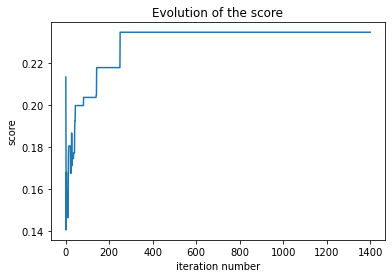

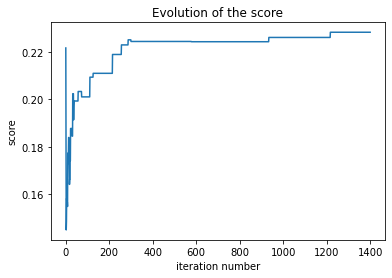

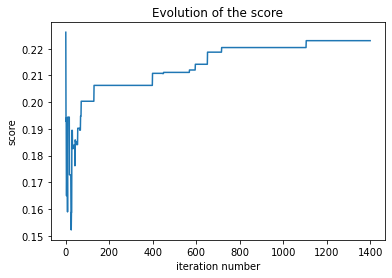

test 0.27743549505486337 0.07464019878253557
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (157.0, 610.0, 0.2573770491803279, 0.5667870036101083, 0.9856918349635259, 0.2046936114732725, 0.9971525520252473, 0.7953063885267275, 0.4332129963898917)
0.26


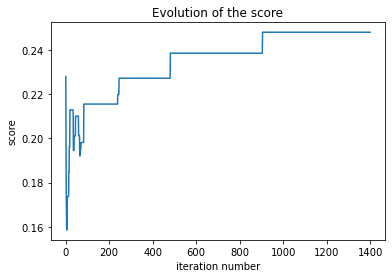

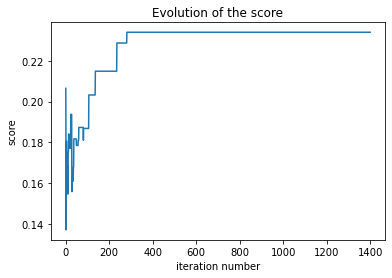

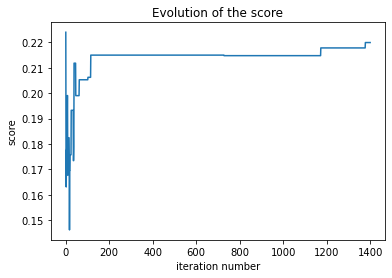

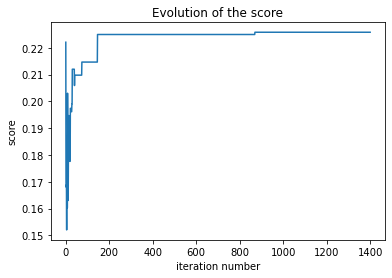

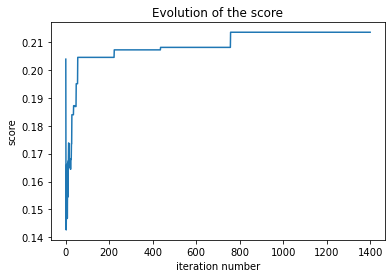

test 0.2878170302420737 0.08104315737604875
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (114.0, 665.0, 0.17142857142857143, 0.40425531914893614, 0.9871101548719738, 0.14634146341463414, 0.9967119426938584, 0.8536585365853658, 0.5957446808510638)
0.31000000000000005


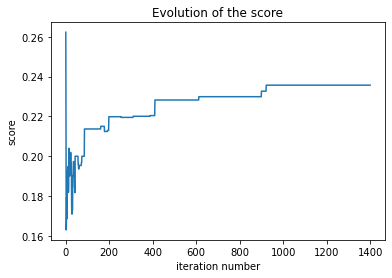

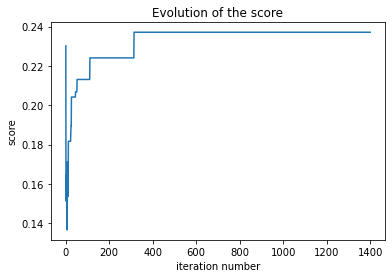

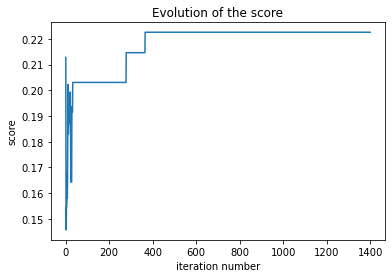

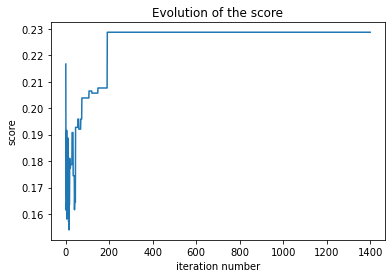

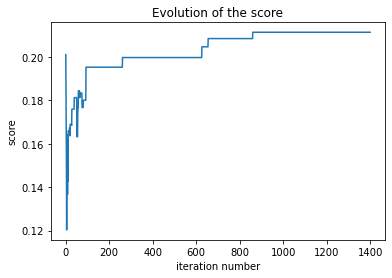

test 0.2875910401581184 0.04495547028922169
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (130.0, 681.0, 0.19089574155653452, 0.4868913857677903, 0.9846112127991322, 0.16029593094944514, 0.9968656340799378, 0.8397040690505548, 0.5131086142322098)
0.36000000000000004


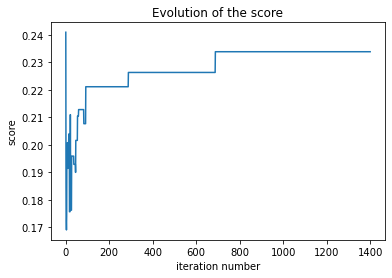

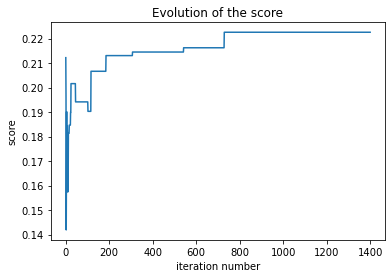

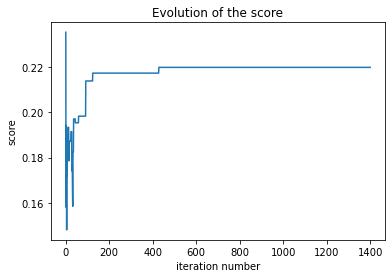

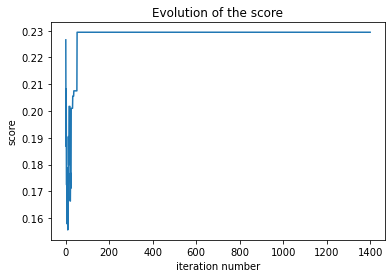

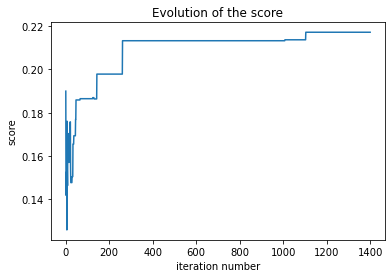

test 0.3124472328524567 0.05496042439025265
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (140.0, 637.0, 0.21978021978021978, 0.4861111111111111, 0.9859487360479993, 0.18018018018018017, 0.9966997435611551, 0.8198198198198198, 0.5138888888888888)
0.41000000000000003


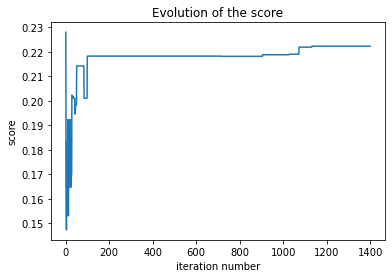

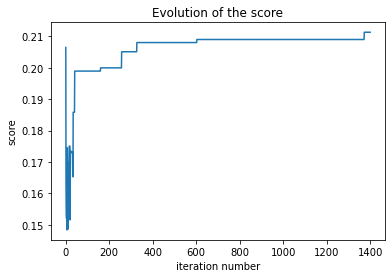

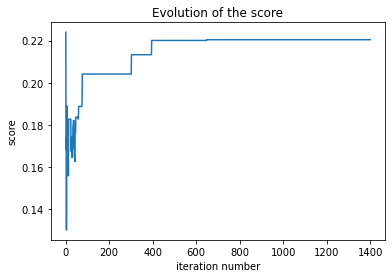

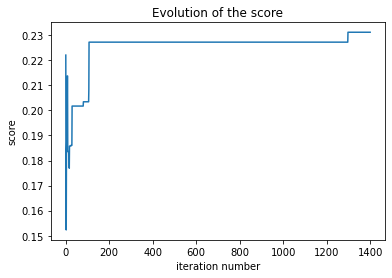

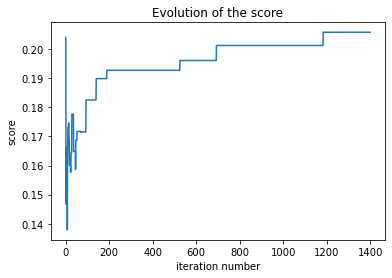

test 0.3069371435264282 0.0735262696608205
TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR =  (127.0, 647.0, 0.19629057187017002, 0.44405594405594406, 0.9863548169394297, 0.1640826873385013, 0.9966118308898738, 0.8359173126614987, 0.5559440559440559)
0.46


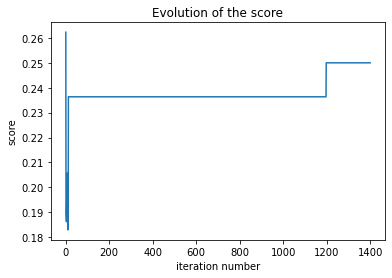

KeyboardInterrupt: 

In [13]:
prob =  np.arange(0.01,0.47,0.05)

for p in prob:
    print(p)
    #Define parameters for MI + stimulated annealing method
    N = np.array([700])
    kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_iter': 1400, 'n_neighbors': 3, 'p_mutate': p, 'c': 1, 'plot': True} 

    subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  MI_stimulated_annealing, **kwargs)

    mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
    print('test', mean_score_test, std_score_test)

    #Predict and evaluate on whole data  set
    model = FamiliesClusters(np.unique(y),compute_precision,True)
    x_subset = LK[:, subset]
    pred = model.fit_predict(x_subset,y)

    print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

# Mutual information and genetic feature selection

In [ ]:
#Define parameters for MI + genetic algorithm method
N = np.array([700])                            
kwargs = {'Model': FamiliesClusters, 'Scoring': compute_precision,'maximize': True,'N': N, 'n_neighbors': 3, 'n_population': 300, 'crossover_proba': 0.5, 'mutation_proba': 0.2, 'n_generations': 120, 'tournament_size': 3, 'plot': True} 

subset, score_training, score_testing = cross_validation(y,LK, FamiliesClusters, compute_precision,True, 5,  MI_genetic_fs, **kwargs)

mean_score_test, std_score_test = np.mean(score_testing), np.std(score_testing)    
print('test', mean_score_test, std_score_test)

#Predict and evaluate on whole data  set
model = FamiliesClusters(np.unique(y),compute_precision,True)
x_subset = LK[:, subset]
pred = model.fit_predict(x_subset,y)

print("TP, FP, ratio, sensitivity, specificity, precision, NPV, FDR, FNR = ", compute_statTP(y,pred)) 

# Create csv file with best subset gene

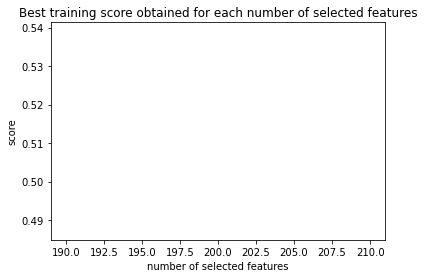

In [9]:
N = np.array([200])
best_subset, best_score = MIM(y, LK, FamiliesClusters, compute_sensitivity,True,N, 4, plot=True)

In [10]:
#Create .csv with names of this subset
get_best_genes_names(best_subset, '../data/processed_data/LKgenes_interest.csv', '../data/optimized_subsets/LKgenes_best.csv')